In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#read the data
telco_df = pd.read_csv('clean_telco.csv')

In [4]:
telco_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [5]:
telco_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

(array([862., 376., 374., 242., 215., 302., 179., 257., 134., 175., 252.,
        129., 209., 133., 153., 174., 120., 200., 112., 142., 198., 148.,
        202., 145., 127., 222., 152., 263., 195., 651.]),
 array([ 0. ,  2.4,  4.8,  7.2,  9.6, 12. , 14.4, 16.8, 19.2, 21.6, 24. ,
        26.4, 28.8, 31.2, 33.6, 36. , 38.4, 40.8, 43.2, 45.6, 48. , 50.4,
        52.8, 55.2, 57.6, 60. , 62.4, 64.8, 67.2, 69.6, 72. ]),
 <BarContainer object of 30 artists>)

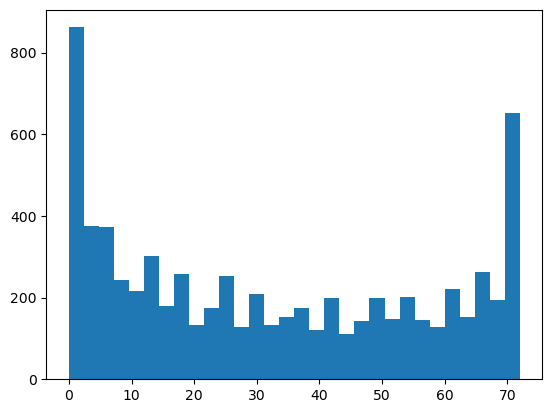

In [6]:
#creates histogram of tenure
plt.hist(telco_df['tenure'], bins=30)

(array([868., 316.,  66., 343.,  13.,  59.,  25.,  25.,  74.,   8.,  62.,
         32.,  57., 194.,  19., 190., 107.,  96., 204.,  43., 148.,  85.,
         67., 125.,  48., 278., 116., 166., 265.,  66., 308., 156., 150.,
        259.,  82., 270., 130., 165., 213.,  93., 236., 114., 149., 177.,
         82., 115.,  58.,  50.,  54.,  17.]),
 array([ 18.25,  20.26,  22.27,  24.28,  26.29,  28.3 ,  30.31,  32.32,
         34.33,  36.34,  38.35,  40.36,  42.37,  44.38,  46.39,  48.4 ,
         50.41,  52.42,  54.43,  56.44,  58.45,  60.46,  62.47,  64.48,
         66.49,  68.5 ,  70.51,  72.52,  74.53,  76.54,  78.55,  80.56,
         82.57,  84.58,  86.59,  88.6 ,  90.61,  92.62,  94.63,  96.64,
         98.65, 100.66, 102.67, 104.68, 106.69, 108.7 , 110.71, 112.72,
        114.73, 116.74, 118.75]),
 <BarContainer object of 50 artists>)

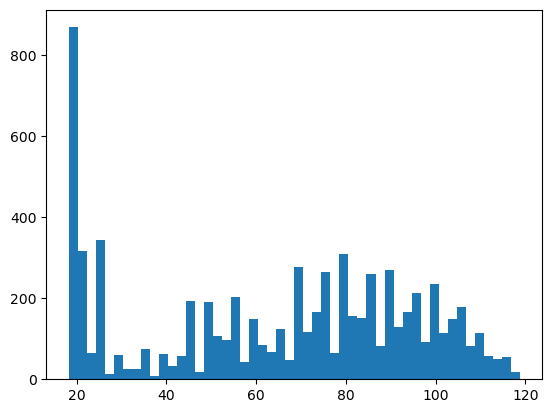

In [7]:
#plot a histogram of monthly charges
plt.hist(telco_df['MonthlyCharges'], bins=50)

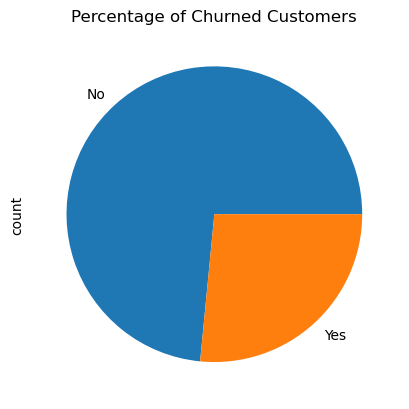

In [26]:
#plots percentage of churned customers
telco_df['Churn'].value_counts().plot(kind='pie')
plt.title('Percentage of Churned Customers')
plt.savefig('churn_pie.png')

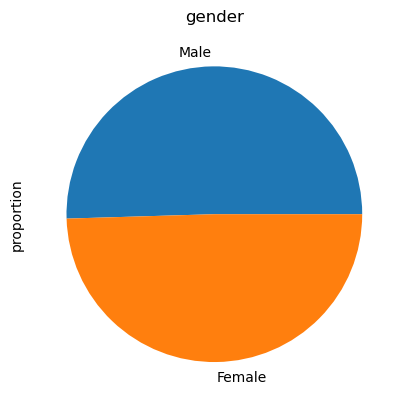

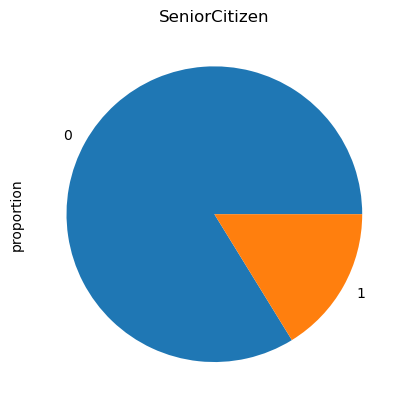

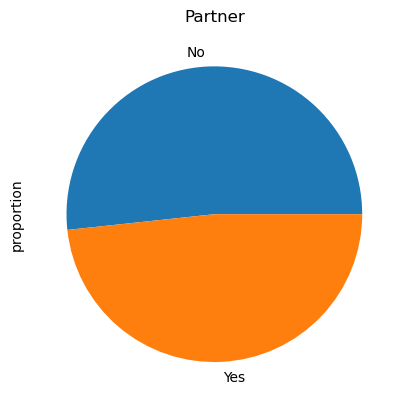

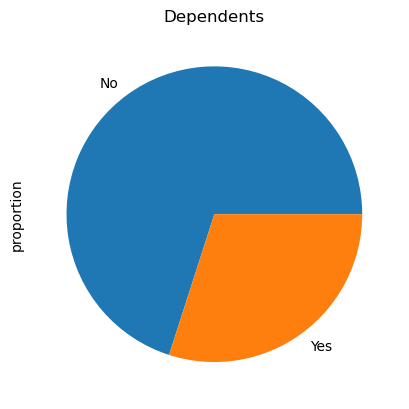

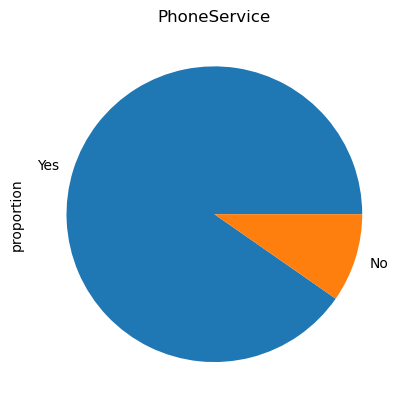

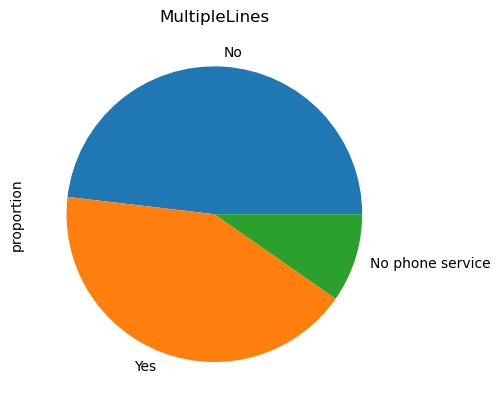

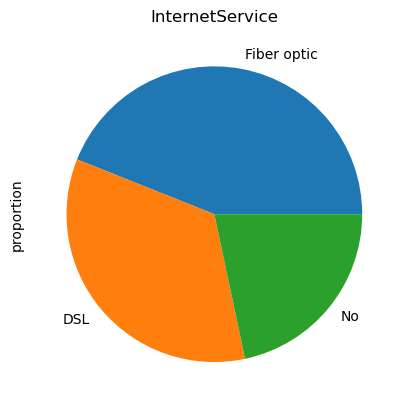

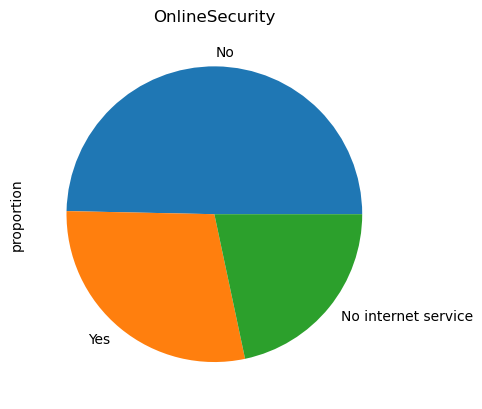

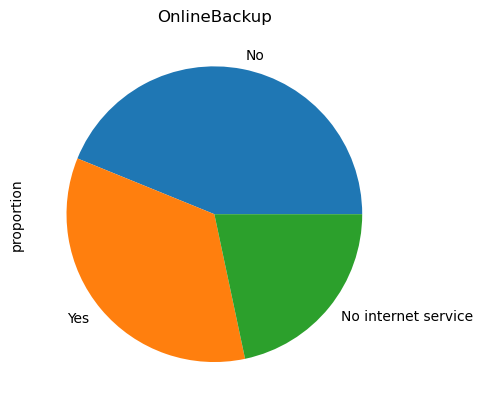

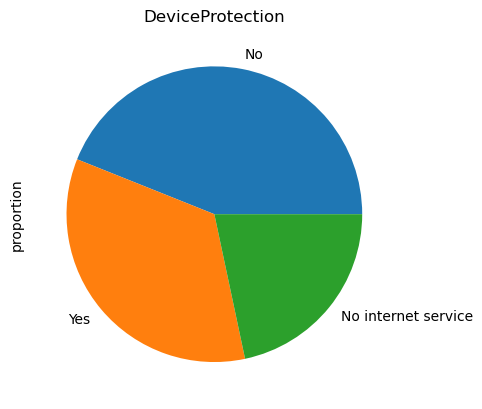

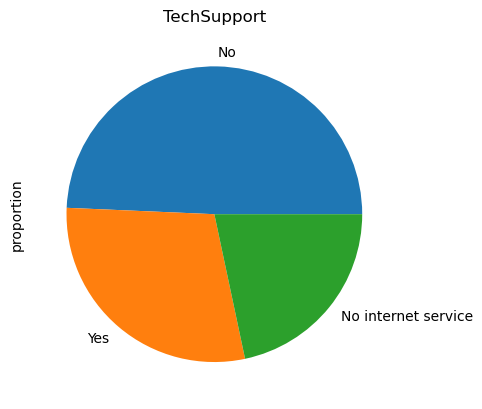

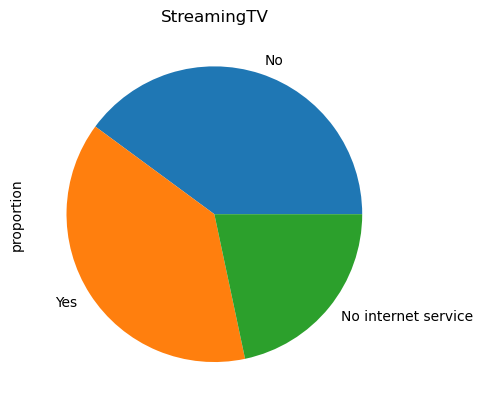

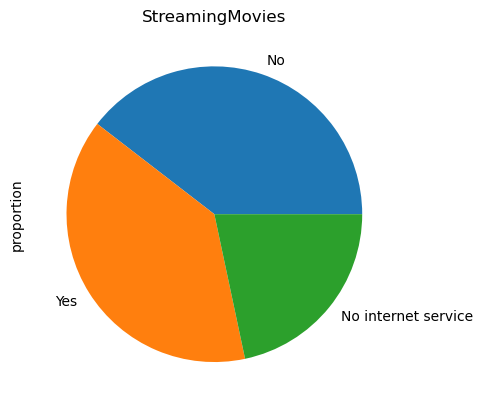

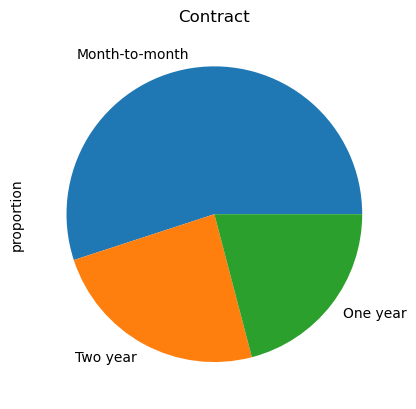

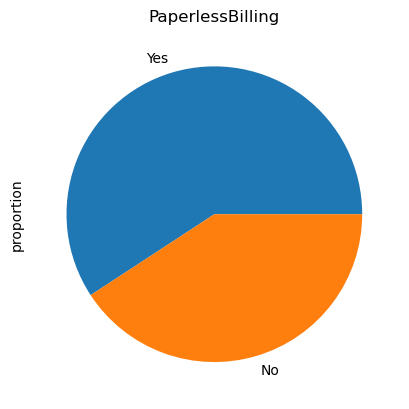

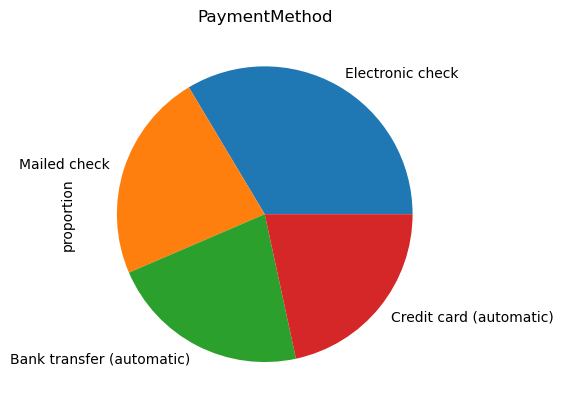

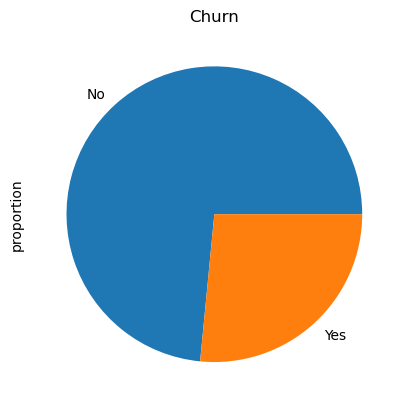

In [9]:
#creates normalized value counts of each column and plots only if there are less than 10 unique values
for column in telco_df.columns:
    if telco_df[column].nunique() < 10:
        telco_df[column].value_counts(normalize=True).plot(kind='pie')
        plt.title(column)
        plt.show()

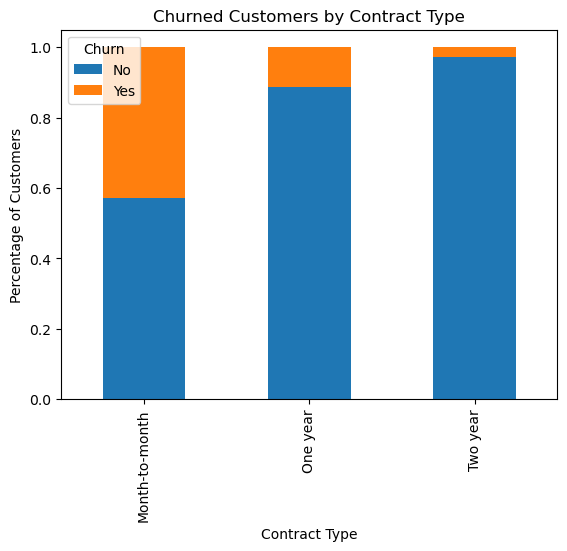

In [33]:
#creates a chart of churned customers by contract type
telco_df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', stacked='True')
plt.title('Churned Customers by Contract Type')
plt.ylabel('Percentage of Customers')
plt.xlabel('Contract Type')
plt.savefig('churn_contract.png', bbox_inches='tight')

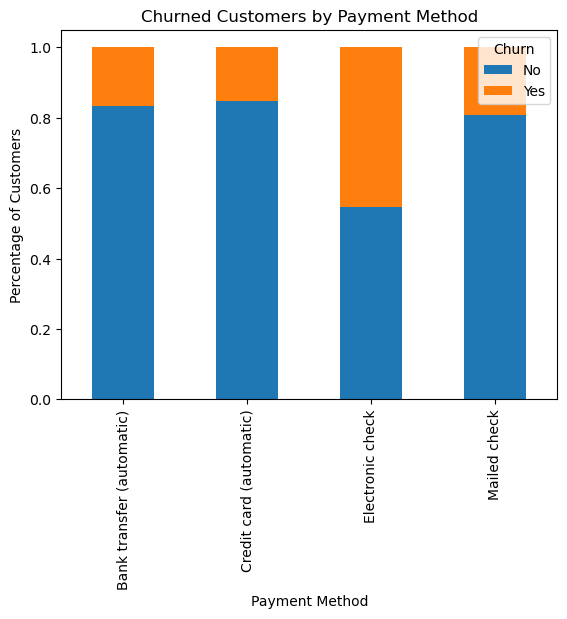

In [32]:
#creates a chart of churned customers by payment method
telco_df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', stacked='True')
plt.title('Churned Customers by Payment Method')
plt.ylabel('Percentage of Customers')
plt.xlabel('Payment Method')
plt.savefig('churn_payment.png', bbox_inches='tight')

C:\Users\Nolan\AppData\Local\Temp\ipykernel_7608\3662245474.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(telco_df.MonthlyCharges[(telco_df["Churn"] == 'No') ],
C:\Users\Nolan\AppData\Local\Temp\ipykernel_7608\3662245474.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(telco_df.MonthlyCharges[(telco_df["Churn"] == 'Yes') ],


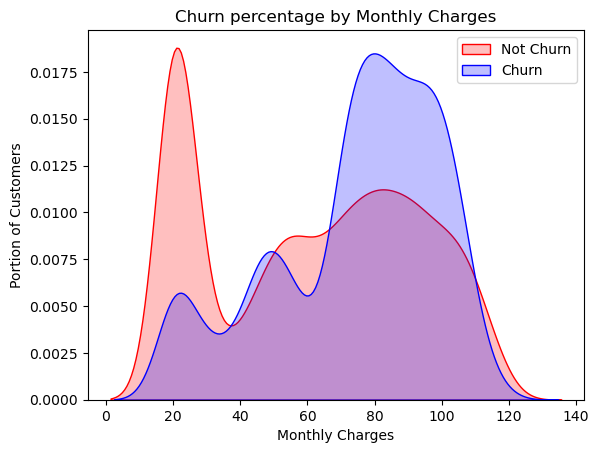

In [29]:
#creates a line plot of churned customers by monthly charges in 5 dollar increments in seaborn as a percentage
ax = sns.kdeplot(telco_df.MonthlyCharges[(telco_df["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(telco_df.MonthlyCharges[(telco_df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Portion of Customers')
ax.set_xlabel('Monthly Charges')
ax.set_title('Churn percentage by Monthly Charges')
plt.savefig('churn_monthly.png')